## Imports

In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import string
from sklearn.preprocessing import OneHotEncoder
import re
from pyth.plugins.rtf15.reader import Rtf15Reader
from pyth.plugins.plaintext.writer import PlaintextWriter
import tkinter as tk
from tkinter import messagebox

## Creating Word2Vec Model with Google Pre-trained data

In [4]:
#Loading in Data from Google News data
#Pre-trained word2vec models uses SkipGram
Word2Vec_G_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
Word2Vec_G_model.save("Pretrained_Word2Vec_Model.model")

In [5]:
#Ensuring Word2Vec Model
Word2Vec_G_model = KeyedVectors.load("Pretrained_Word2Vec_Model.model")

In [6]:
#Identiying similar words to "Hello" as an example test
Word2Vec_G_model.most_similar("hello", topn=10)

[('hi', 0.654898464679718),
 ('goodbye', 0.639905571937561),
 ('howdy', 0.6310957074165344),
 ('goodnight', 0.5920578241348267),
 ('greeting', 0.5855878591537476),
 ('Hello', 0.5842196345329285),
 ("g'day", 0.575407862663269),
 ('See_ya', 0.5688872337341309),
 ('ya_doin', 0.5643121004104614),
 ('greet', 0.5636604428291321)]

In [7]:
#Saving the model after all modifications
Word2Vec_G_model.save("Pretrained_Word2Vec_Model.model")

## Creating Word2Vec Model with Harry Potter Text

In [8]:
# Convert RTF to plain text as harry potter file has rtf formatting
def rtf_to_text(rtf_path):
    document = Rtf15Reader.read(open(rtf_path, 'rb'))
    text = PlaintextWriter.write(document).getvalue()
    return text

# Read and convert RTF to plain text
hp_text = rtf_to_text('./HarryPotter.txt')

In [9]:
# Function to clean harry potter text
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text) #Remove all characters not letters digits or whitespaces
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Clean the hp_text
hp_text = clean_text(hp_text)

In [10]:
# Read and convert RTF to plain text
hp_text = rtf_to_text('./HarryPotter.txt')

In [11]:
# Clean the hp_text
hp_text = clean_text(hp_text)

In [12]:
#Sanity Check
print(hp_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
# Tokenize the harry potter text into words
hp_text_tokens = hp_text.split()

# Prepare the data for Word2Vec model
hp_data = [hp_text_tokens]


In [14]:
# Prepare the data for Word2Vec model
hp_data = [hp_text_tokens]

print(hp_data[:2])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
with open("list_of_tokens.txt", "w") as f:
    for token in hp_data:
        f.write("%s\n" % token)

In [16]:
# Define and train the Word2Vec model
word2vec_model_hp = Word2Vec(sentences=hp_data, sg=1) #Using Skipgram

In [17]:
#Saving the Model
word2vec_model_hp.save("HarryPotter_Word2Vec_Model.model")

In [18]:
#Loading the model back in
word2vec_model_hp = KeyedVectors.load("HarryPotter_Word2Vec_Model.model")

In [19]:
#Identiying similar words to "Hello" as an example test
word2vec_model_hp.wv.most_similar("hello", topn=10)

[('wormtail', 0.4082074761390686),
 ('flicking', 0.3299165666103363),
 ('etched', 0.31613707542419434),
 ('euphoria', 0.31468892097473145),
 ('div', 0.311764121055603),
 ('direct', 0.311526894569397),
 ('greatness', 0.3109626770019531),
 ('frog', 0.309980183839798),
 ('fee', 0.30158528685569763),
 ('limb', 0.294516384601593)]

In [20]:
#Saving the model after all modifications
word2vec_model_hp.save("HarryPotter_Word2Vec_Model.model")

## Loading in Movie Review Dataset

In [21]:
#Loading in data into dataframe
movie_data = pd.read_csv('./movie_review.csv') 

In [22]:
#Printing out current format of the data
movie_data 

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


In [23]:
#Dropping off columns that are not needed
movie_data.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis = 1) 

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [24]:
#Map numerical values to pos and neg
mapping = {'pos': 1, 'neg': 0}

#Switching the positive/negative to binary 1/0
movie_data['tag'] = movie_data['tag'].map(mapping) 


In [25]:
#displaying dataframe to confirm 
movie_data 

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,1
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",1
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,1
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",1
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",1
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,0
64716,9,cv999,14636,21,like too many of the skits on the current inca...,0
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",0
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",0


In [26]:
#Dropping off columns that are not needed
movie_data.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis = 1) 

,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,"after watching one of the "" roxbury "" skits on...",0
64718,"bump unsuspecting women , and . . . that's all .",0


In [27]:
# Remove punctuation and make lowercase function
def remove_punc_and_lower(text):
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

#Removing punctuation
movie_data['text'] = [remove_punc_and_lower(text) for text in movie_data['text']]

In [28]:
#Removing extra spaces function
def remove_extra_spaces(strings):
    clean_string = [ ' '.join(string.split()) for string in strings ]
    return clean_string

#Removing extra spaces
movie_data['text'] = remove_extra_spaces(movie_data['text'])

In [29]:
#Displaying movie_data to see if punctuation has been removed
movie_data.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis = 1)

,text,tag
0,films adapted from comic books have had plenty...,1
1,for starters it was created by alan moore and ...,1
2,to say moore and campbell thoroughly researche...,1
3,the book or graphic novel if you will is over ...,1
4,in other words dont dismiss this film because ...,1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,after watching one of the roxbury skits on snl...,0
64718,bump unsuspecting women and thats all,0


## Load in Restaurant Review Dataset

In [30]:
#Loading in data into dataframe
restaurant_data = pd.read_table('./restaurant_reviews.txt', delimiter='\t') 

In [31]:
#Looking at loaded inn Data
restaurant_data

,Review,Liked
0,Wow... Loved this place.,1\
1,Crust is not good.,0\
2,Not tasty and the texture was just nasty.,0\
3,Stopped by during the late May bank holiday of...,1\
4,The selection on the menu was great and so wer...,1\
...,...,...
995,I think food should have flavor and texture an...,0\
996,Appetite instantly gone.,0\
997,Overall I was not impressed and would not go b...,0\
998,"The whole experience was underwhelming, and I ...",0\


In [32]:
#remove non-numeric characters from liked to keep 1 and 0. Keeping integers as movie labels are int
restaurant_data['Liked'] = restaurant_data['Liked'].str.strip().str.replace(r'\D', '', regex=True).astype(int)

In [33]:
restaurant_data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [34]:
#Removing punctuation
restaurant_data['Review'] = [remove_punc_and_lower(text) for text in restaurant_data['Review']]

In [35]:
#Removing extra spaces
restaurant_data['Review'] = remove_extra_spaces(restaurant_data['Review'])

In [36]:
#Displaying restaurant_data to see if punctuation has been removed
restaurant_data

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone,0
997,overall i was not impressed and would not go back,0
998,the whole experience was underwhelming and i t...,0


## Logistic Regression With Word2Vec

In [37]:
#Load pre-trained word2vec embeddings
word2vec_model = KeyedVectors.load("Pretrained_Word2Vec_Model.model")


In [38]:
#Getting text from movie review data
texts = movie_data['text']

# 1 for positive, 0 for negative sentiment
labels = movie_data['tag'] 

In [39]:
# Split the dataset keeping 30% for testing
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [40]:
print(word2vec_model)

KeyedVectors<vector_size=300, 3000000 keys>


In [41]:
# Convert texts to average word2vec embeddings as logistic regression requires numerical input
def text_to_avg_word2vec(text):
    words = text.split() #Seperates sentences into words
    
    #Filters out words not present in the embedding to improve accuracy
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings: #Checks to see if any words in the reviews exists in the Word2Vec model
        
        #If the embedding contains the word in the sentence, the word will be given the average vector from the embedding
        return np.mean(embeddings, axis=0)#Averageing vectors to a fixed size vector for logistic regression
    else:
        return np.zeros(word2vec_model.vector_size) #Vectors of zeros for word not in embedding



In [42]:
#X_train contains training reviews with average vector from the embedding
X_train_vec = [text_to_avg_word2vec(text) for text in X_train]

#X_test contains training reviews with average vector from embedding
X_test_vec = [text_to_avg_word2vec(text) for text in X_test]

In [43]:
#Set up Logistic regression model
classifier = LogisticRegression(max_iter=1000)

#Train logistic regression model on training vector and Y_train
classifier.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [44]:
#Predict sentiment of testing reviews
y_pred = classifier.predict(X_test_vec)

In [45]:
#Compare predictions and actual sentiment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.6321075401730532


## Logistic Regression With Harry Potter Word2Vec 

In [46]:
#Load pre-trained word2vec embeddings
word2vec_model_hp = KeyedVectors.load("HarryPotter_Word2Vec_Model.model")


In [47]:
#Getting text from movie review data
texts = movie_data['text']

# 1 for positive, 0 for negative sentiment
labels = movie_data['tag'] 

In [48]:
# Split the dataset keeping 30% for testing
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [49]:
print(X_train)

42271    even the intellectuals i know dont bother with...
17965    together with other young directors of his new...
34526    their songs are alright but they play like lif...
21093    things change when he devises cunning plan and...
3884     real murderers rarely have dialogue as witty a...
                               ...                        
62570    other laughable moments include a luc going to...
38158    even that aspect of the film fails throwing in...
860      it was schreber who contacted john for reasons...
15795    sure some have been excellent bound and the us...
56422    its a dismal thirdrate farrelly brothers rip o...
Name: text, Length: 45304, dtype: object


In [50]:
""" # Convert texts to average word2vec embeddings as logistic regression requires numerical input
def text_to_avg_word2vec_hp(text):
    words = text.split() #Seperates sentences into words
    #Filters out words not present in the embedding to improve accuracy
    embeddings = []  # Initialize an empty list to store word embeddings
    for word in words:
        if word in word2vec_model_hp.wv.key_to_index:  # Check if the word is in the model's vocab
            embeddings.append(word2vec_model_hp.wv[word]) 
    if embeddings: #see if any words in the review exists in the harry potter  model
        
        #If the embedding contains the word in the sentence, the word will be given the average vector from the embedding
        return np.mean(embeddings, axis=0)#Averageing vectors to a fixed size vector for logistic regression
    else:
        return np.zeros(word2vec_model_hp.vector_size) #Vectors of zeros for word not in embedding """

" # Convert texts to average word2vec embeddings as logistic regression requires numerical input\ndef text_to_avg_word2vec_hp(text):\n    words = text.split() #Seperates sentences into words\n    #Filters out words not present in the embedding to improve accuracy\n    embeddings = []  # Initialize an empty list to store word embeddings\n    for word in words:\n        if word in word2vec_model_hp.wv.key_to_index:  # Check if the word is in the model's vocab\n            embeddings.append(word2vec_model_hp.wv[word]) \n    if embeddings: #see if any words in the review exists in the harry potter  model\n        \n        #If the embedding contains the word in the sentence, the word will be given the average vector from the embedding\n        return np.mean(embeddings, axis=0)#Averageing vectors to a fixed size vector for logistic regression\n    else:\n        return np.zeros(word2vec_model_hp.vector_size) #Vectors of zeros for word not in embedding "

In [51]:
# Convert texts to average word2vec embeddings as logistic regression requires numerical input
def text_to_avg_word2vec_hp(text):
    words = text.split() #Seperates sentences into words
    
    #Filters out words not present in the embedding to improve accuracy
    embeddings = [word2vec_model_hp.wv[word] for word in words if word in word2vec_model_hp.wv.key_to_index]
    if embeddings: #Checks to see if any words in the reviews exists in the Word2Vec model
        
        #If the embedding contains the word in the sentence, the word will be given the average vector from the embedding
        return np.mean(embeddings, axis=0)#Averageing vectors to a fixed size vector for logistic regression
    else:
        return np.zeros(word2vec_model_hp.vector_size) #Vectors of zeros for word not in embedding



In [52]:
#X_train contains training reviews with average vector from the embedding
X_train_vec = [text_to_avg_word2vec_hp(text) for text in X_train]

#X_test contains training reviews with average vector from embedding
X_test_vec = [text_to_avg_word2vec_hp(text) for text in X_test]

In [53]:
#Set up Logistic regression model
classifier_hp = LogisticRegression(max_iter=1000)

#Train logistic regression model on training vector and Y_train
classifier_hp.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [54]:
#Predict sentiment of testing reviews
y_pred = classifier_hp.predict(X_test_vec)

In [55]:
#Compare predictions and actual sentiment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.20f}")

Accuracy: 0.54393283889575605450


## Logistic Regression Without Word2Vec

In [97]:
#Getting text from movie review data
texts = movie_data['text']

# 1 for positive, 0 for negative sentiment
labels = movie_data['tag'] # 1 for positive, 0 for negative sentiment

In [98]:
# Split the dataset keeping 30% for testing
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)#

In [99]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Convert to a numpy array and reshape for training data
X_train_reshaped = X_train.values.reshape(-1, 1)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train_reshaped)

# Convert to a numpy array and reshape for testing data
X_test_reshaped = X_test.values.reshape(-1, 1)

# Transform testing data
X_test_encoded = encoder.transform(X_test_reshaped)

/Users/sameergupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
#Set up logistic regression model for non Word2Vec model
classifier_reg = LogisticRegression(max_iter=1000)

#Fit logistic regression on training data
#Can take ~15 min to run
classifier_reg.fit(X_train_encoded, y_train)



LogisticRegression(max_iter=1000)

In [103]:
#Predict sentiment of testing reviews
y_pred = classifier_reg.predict(X_test_encoded)

In [104]:
#Compare predictions and actual sentiment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.5180263700041203


## Logistic Regression With Google Word2Vec: Whole Movie Dataset Training Restaurant Test

In [76]:
#Getting text from movie review data
movie_texts = movie_data['text']

# 1 for positive, 0 for negative sentiment
movie_labels = movie_data['tag'] # 1 for positive, 0 for negative sentiment

In [77]:
#Getting text from restaurant review data
restaurant_texts = restaurant_data['Review']

# 1 for positive, 0 for negative sentiment
restaurant_labels = restaurant_data['Liked'] # 1 for positive, 0 for negative sentiment

In [78]:
# Convert texts to average word2vec embeddings as logistic regression requires numerical input
def text_to_avg_word2vec(text):
    words = text.split() #Seperates sentences into words
    
    #Filters out words not present in the embedding to improve accuracy
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings: #Checks to see if any words in the reviews exists in the Word2Vec model
        
        #If the embedding contains the word in the sentence, the word will be given the average vector from the embedding
        return np.mean(embeddings, axis=0)#Averageing vectors to a fixed size vector for logistic regression
    else:
        return np.zeros(word2vec_model.vector_size) #Vectors of zeros for word not in embedding



In [79]:
#X_train contains all movie reviews with average vector from the embedding
X_train_vec = [text_to_avg_word2vec(text) for text in movie_texts]

#X_test contains restaurant reviews labels with average vector from embedding
X_test_vec = [text_to_avg_word2vec(text) for text in restaurant_texts]

In [80]:
#Setting y_train equal to all movie review labels
y_train = movie_labels

#Setting y_test to all restaurant review labels
y_test = restaurant_labels

In [81]:
#Set up Logistic regression model
classifier_final = LogisticRegression(max_iter=1000)

#Train logistic regression model on training vector and Y_train
classifier_final.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [82]:
#Predict sentiment of testing reviews
y_pred = classifier_final.predict(X_test_vec)

In [83]:
#Compare predictions and actual sentiment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.20f}")

Accuracy: 0.75400000000000000355


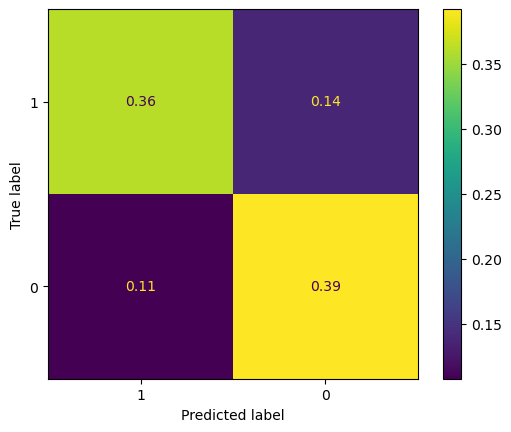

In [84]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred, normalize = 'all') #Setting up the matrix
matrix = ConfusionMatrixDisplay(matrix, display_labels=['1', '0']) #Making matrix nice
matrix.plot() #Printing matrix

# API Packaging

In [125]:
#Function will predict the sentiment of a single sentence
#Parameter statement is a single string
#Will utilize Final Embedding with word2vec
def predict_sentiment(statement):

    #statement contains restaurant reviews labels with average vector from embedding
    statement = [text_to_avg_word2vec(statement)]

    sentiment = classifier_final.predict(statement)

    if sentiment.flat[0] == 0:
        sentiment = "The given text is negative"
    else:
        sentiment = "The given text is positive"
    print(sentiment)

In [126]:
print(predict_sentiment("I thought the food was horrible"))

The given text is negative
None


In [127]:
print(predict_sentiment("The food was amazing. I enjoyed the food!"))

The given text is positive
None


In [128]:
print(predict_sentiment("I liked the food but it could have been better"))

The given text is negative
None


In [132]:
# Create a function to predict the sentiment given text
def on_button_click():
    input_text = input_entry.get()
    try:
        predict_sentiment(input_text.lower()) #Printing sentiment prediction in console
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Create GUI
app = tk.Tk()
app.title("Sentiment Analysis")

# Create a label
label = tk.Label(app, text="Enter a string:")
label.pack()

# Create an entry user input
input_entry = tk.Entry(app, width=40)
input_entry.pack()

# Create a button to trigger analysis
button = tk.Button(app, text="Analyze", command=on_button_click)
button.pack()

# Run
app.mainloop()

The given text is positive
